<a href="https://colab.research.google.com/github/Ashkabsha/TimeSeries/blob/main/lstm2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Packages

In [31]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


Importing Data

In [32]:
df=pd.read_csv("TSLA.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-12,18.762667,19.500000,18.576668,19.369333,19.369333,150231000
1,2018-09-13,19.201332,19.666668,19.011999,19.297333,19.297333,95104500
2,2018-09-14,19.250668,19.822001,19.101334,19.680000,19.680000,101484000
3,2018-09-17,19.336000,20.058001,19.208668,19.656000,19.656000,103314000
4,2018-09-18,19.779333,20.176001,18.366667,18.997334,18.997334,248212500
5,2018-09-19,18.700666,20.000000,18.700001,19.934668,19.934668,124423500
6,2018-09-20,20.237333,20.398666,19.555332,19.888666,19.888666,110241000
7,2018-09-21,19.846666,20.038668,19.691334,19.940001,19.940001,75757500
8,2018-09-24,19.898666,20.200001,19.572001,19.978666,19.978666,72645000
9,2018-09-25,20.000000,20.306667,19.766666,20.066000,20.066000,67225500


<Axes: >

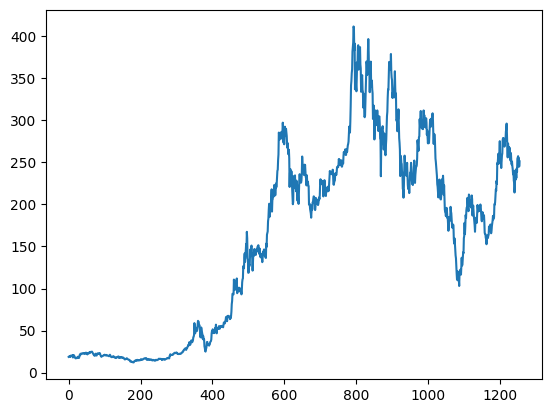

In [33]:
df['Open'].plot()

In [34]:
b_size=16
epoch=1000
train_per=0.8
w_size=120
f_size=30

In [35]:
t_size=int(len(df)*train_per)

Train-Test Split

In [36]:
training = df.iloc[:t_size, 1:2].values
testing = df.iloc[t_size:, 1:2].values

Normalization

In [37]:
sc = MinMaxScaler(feature_range = (0, 1))
training_scaled = sc.fit_transform(training)

Create target values

In [38]:
x_train = []
y_train = []
for iter in range(w_size, t_size):
    x_train.append(training_scaled[iter-w_size:iter, 0])
    y_train.append(training_scaled[iter, 0])
x_train, y_train=np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

Defining Model

In [39]:
algo = Sequential()
algo.add(LSTM(units = 60, return_sequences = True, input_shape = (x_train.shape[1], 1)))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 60, return_sequences = True))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 60, return_sequences = True))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 60))
algo.add(Dropout(0.2))
algo.add(Dense(units = 1))
algo.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])
print(algo.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 120, 60)           14880     
                                                                 
 dropout_4 (Dropout)         (None, 120, 60)           0         
                                                                 
 lstm_5 (LSTM)               (None, 120, 60)           29040     
                                                                 
 dropout_5 (Dropout)         (None, 120, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 120, 60)           29040     
                                                                 
 dropout_6 (Dropout)         (None, 120, 60)           0         
                                                                 
 lstm_7 (LSTM)               (None, 60)               

Training Model

In [40]:
algo.fit(x_train, y_train, epochs = epoch, batch_size = b_size)

Epoch 1/1000
56/56 [==============================] - 8s 19ms/step - loss: 0.0196 - accuracy: 0.0023
Epoch 2/1000
56/56 [==============================] - 1s 17ms/step - loss: 0.0061 - accuracy: 0.0023
Epoch 3/1000
56/56 [==============================] - 1s 17ms/step - loss: 0.0058 - accuracy: 0.0023
Epoch 4/1000
56/56 [==============================] - 1s 19ms/step - loss: 0.0054 - accuracy: 0.0023
Epoch 5/1000
56/56 [==============================] - 1s 25ms/step - loss: 0.0056 - accuracy: 0.0023
Epoch 6/1000
56/56 [==============================] - 1s 21ms/step - loss: 0.0060 - accuracy: 0.0023
Epoch 7/1000
56/56 [==============================] - 1s 17ms/step - loss: 0.0044 - accuracy: 0.0023
Epoch 8/1000
56/56 [==============================] - 1s 17ms/step - loss: 0.0053 - accuracy: 0.0023
Epoch 9/1000
56/56 [==============================] - 1s 17ms/step - loss: 0.0049 - accuracy: 0.0023
Epoch 10/1000
56/56 [==============================] - 1s 18ms/step - loss: 0.0036 - accura

Dividing Test values into groups

In [41]:
data_train = df.iloc[:t_size, 1:2]
data_test = df.iloc[t_size:, 1:2]
data_total = df.iloc[:,1:2]
total_input = data_total[len(data_total) - len(data_test) - w_size:].values
total_input = total_input.reshape(-1, 1)
total_input = sc.transform(total_input)
x_test = []
y_test=[]

# Calculate the maximum number of sequences of length w_size that can be created
max_sequences = len(total_input) - w_size

# loop to create a 2D array of x_test
for iter in range(max_sequences):
    x_test.append(total_input[iter:iter+w_size, 0])
    y_test.append(total_input[iter+w_size, 0])     #new addition

x_test = np.array(x_test)

print(x_test.shape)  #  (max_sequences, w_size)


(252, 120)


Prediction

In [42]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_price = algo.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)


8/8 [==============================] - 1s 14ms/step


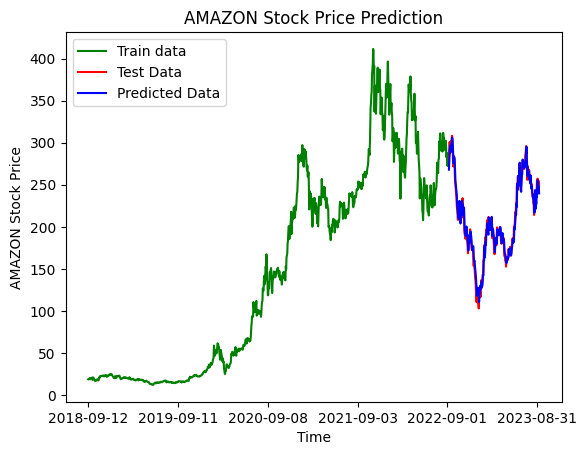

In [43]:
plt.plot(df.loc[:t_size+1,'Date'],df.loc[:t_size+1,'Open'], color='green',label="Train data")
plt.plot(df.loc[t_size:, 'Date'],data_test.values, color = 'red', label = 'Test Data')
plt.plot(df.loc[t_size:, 'Date'],predicted_price, color = 'blue', label = 'Predicted Data')
plt.xticks(np.arange(0,df.shape[0],250))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


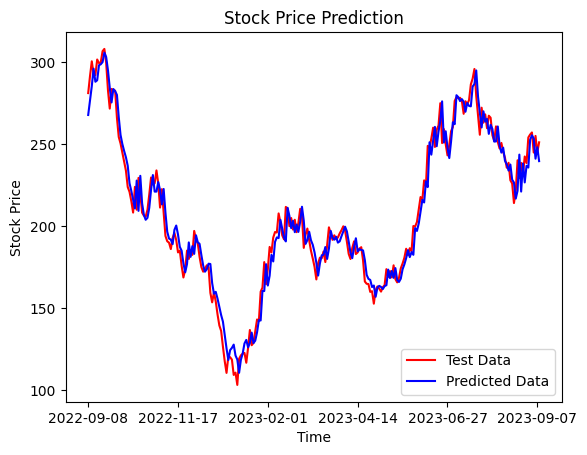

In [56]:
plt.plot(df.loc[t_size:, 'Date'],data_test.values, color = 'red', label = 'Test Data')
plt.plot(df.loc[t_size:, 'Date'],predicted_price, color = 'blue', label = 'Predicted Data')
plt.xticks(np.arange(0,x_test.shape[0],50))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(data_test.values,predicted_price)

mse = mean_squared_error(data_test.values, predicted_price)

rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


Mean Absolute Error (MAE): 7.09
Mean Squared Error (MSE): 77.16
Root Mean Squared Error (RMSE): 8.78


Predict Future

In [46]:
test2=testing.copy()
for i in range(f_size):
  X=test2[-w_size:]
  X=X.reshape(w_size,1)
  X=sc.fit_transform(X)

  X=np.reshape(X,(1,w_size,1))

  close=algo.predict(X)
  y=sc.inverse_transform(close)

  np.append(test2, y)


1/1 [==============================] - 0s 26ms/step


In [47]:
from datetime import datetime, timedelta
x=df.loc[-1:, 'Date']
day=x[len(x)-1]
date_obj = datetime.strptime(day, '%Y-%m-%d')
start_date = date_obj
date_list = [(start_date + timedelta(days=i)).strftime('%Y-%m-%d') for i in range(f_size)]

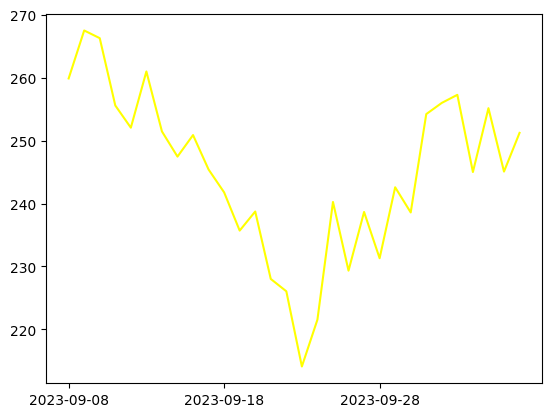

In [48]:
forcasted_data=test2[-f_size:]
plt.plot(date_list,forcasted_data,color='yellow', label="Future data")
plt.xticks(np.arange(0,len(forcasted_data),10))
plt.show()

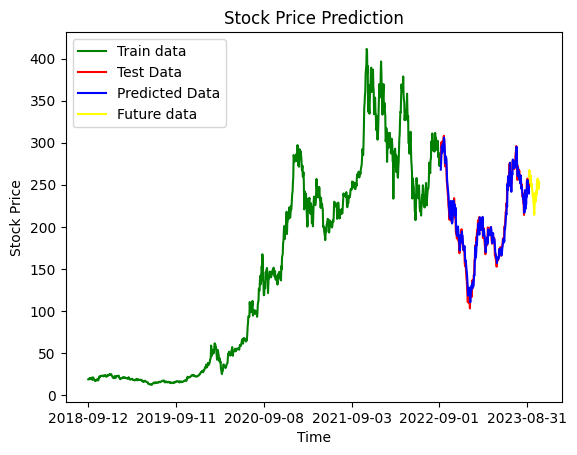

In [54]:

plt.plot(df.loc[:t_size,'Date'],df.loc[:t_size,'Open'], color='green',label="Train data")
plt.plot(df.loc[t_size:, 'Date'],data_test.values, color = 'red', label = 'Test Data')
plt.plot(df.loc[t_size:, 'Date'],predicted_price, color = 'blue', label = 'Predicted Data')
plt.plot(date_list,forcasted_data,color='yellow', label="Future data")
plt.xticks(np.arange(0,df.shape[0],250))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

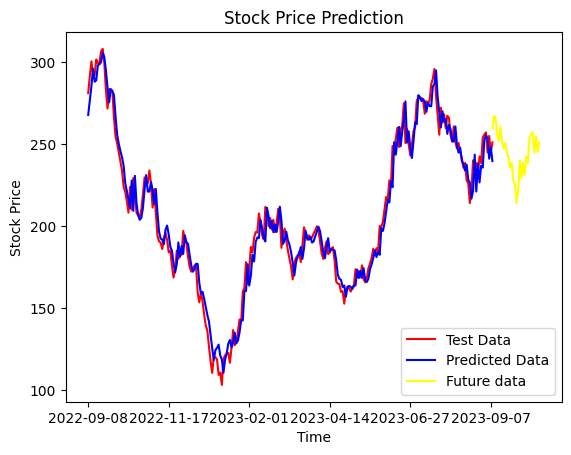

In [55]:
plt.plot(df.loc[t_size:, 'Date'],data_test.values, color = 'red', label = 'Test Data')
plt.plot(df.loc[t_size:, 'Date'],predicted_price, color = 'blue', label = 'Predicted Data')
plt.plot(date_list,forcasted_data,color='yellow', label="Future data")
plt.xticks(np.arange(0,x_test.shape[0],50))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()